In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras
import keras_tuner as kt

from sklearn import svm

import numpy as np

In [2]:
# Direct Kernel Set Training Data
dks_train_1 = pd.read_csv('data/Direct_Kernel_Set_I_Training.csv')
dks_train_2 = pd.read_csv('data/Direct_Kernel_Set_II_Training.csv')
dks_train_3 = pd.read_csv('data/Direct_Kernel_Set_III_Training.csv')

# Direct Kernel Set Classifcation Data
dks_class_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications.csv')
dks_class_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications.csv')

# Direct Kernel Set Classication Results Only Data
dks_results_1 = pd.read_csv('data/Direct_Kernel_Set_I_Classifications_ResultsOnly.csv')
dks_results_2 = pd.read_csv('data/Direct_Kernel_Set_II_Classifications_ResultsOnly.csv')
dks_results_3 = pd.read_csv('data/Direct_Kernel_Set_III_Classifications_ResultsOnly.csv')

In [3]:
# Variational Set 1 Training Data
var_train_1d0 = pd.read_csv('data/Variational_Set_I_d0_Training.csv')
var_train_1d1 = pd.read_csv('data/Variational_Set_I_d1_Training.csv')
var_train_1d2 = pd.read_csv('data/Variational_Set_I_d2_Training.csv')
var_train_1d3 = pd.read_csv('data/Variational_Set_I_d3_Training.csv')
var_train_1d4 = pd.read_csv('data/Variational_Set_I_d4_Training.csv')


# Variational Set 2 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_II_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_II_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_II_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_II_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_II_d4_Training.csv')


# Variational Set 3 Training Data
var_train_2d0 = pd.read_csv('data/Variational_Set_III_d0_Training.csv')
var_train_2d1 = pd.read_csv('data/Variational_Set_III_d1_Training.csv')
var_train_2d2 = pd.read_csv('data/Variational_Set_III_d2_Training.csv')
var_train_2d3 = pd.read_csv('data/Variational_Set_III_d3_Training.csv')
var_train_2d4 = pd.read_csv('data/Variational_Set_III_d4_Training.csv')

# Variational Set 1 Classification Results Only Data
var_class_results_1d0 = pd.read_csv('data/Variational_Set_I_d0_Classifications_ResultsOnly.csv')
var_class_results_1d1 = pd.read_csv('data/Variational_Set_I_d1_Classifications_ResultsOnly.csv')
var_class_results_1d2 = pd.read_csv('data/Variational_Set_I_d2_Classifications_ResultsOnly.csv')
var_class_results_1d3 = pd.read_csv('data/Variational_Set_I_d3_Classifications_ResultsOnly.csv')
var_class_results_1d4 = pd.read_csv('data/Variational_Set_I_d4_Classifications_ResultsOnly.csv')

# Variational Set 2 Classification Results Only Data
var_class_results_2d0 = pd.read_csv('data/Variational_Set_II_d0_Classifications_ResultsOnly.csv')
var_class_results_2d1 = pd.read_csv('data/Variational_Set_II_d1_Classifications_ResultsOnly.csv')
var_class_results_2d2 = pd.read_csv('data/Variational_Set_II_d2_Classifications_ResultsOnly.csv')
var_class_results_2d3 = pd.read_csv('data/Variational_Set_II_d3_Classifications_ResultsOnly.csv')
var_class_results_2d4 = pd.read_csv('data/Variational_Set_II_d4_Classifications_ResultsOnly.csv')

# Variational Set 3 Classification Results Only Data
var_class_results_3d0 = pd.read_csv('data/Variational_Set_III_d0_Classifications_ResultsOnly.csv')
var_class_results_3d1 = pd.read_csv('data/Variational_Set_III_d1_Classifications_ResultsOnly.csv')
var_class_results_3d2 = pd.read_csv('data/Variational_Set_III_d2_Classifications_ResultsOnly.csv')
var_class_results_3d3 = pd.read_csv('data/Variational_Set_III_d3_Classifications_ResultsOnly.csv')
var_class_results_3d4 = pd.read_csv('data/Variational_Set_III_d4_Classifications_ResultsOnly.csv')

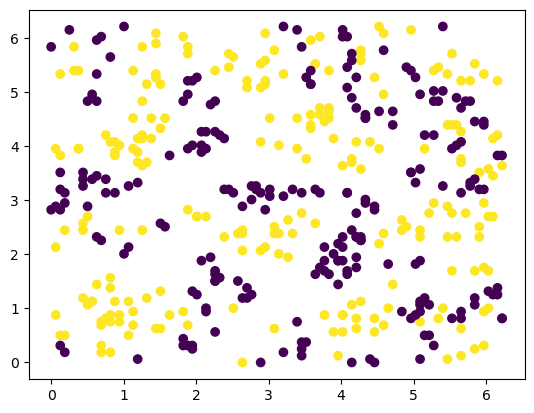

In [5]:
plt.scatter(dks_class_1.iloc[:, 1], dks_class_1.iloc[:, 2], c = dks_class_1.iloc[:, 3])
plt.show()

In [6]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape = (2,)))
    num_layers = hp.Int('num_layers', min_value = 2, max_value = 6, step = 2)
    num_units = hp.Int('num_units', min_value = 2, max_value = 16, step = 2)
    for i in range(num_layers):
        model.add(tf.keras.layers.Dense(num_units, activation = 'tanh'))
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 5e-2, 1e-2, 5e-3, 1e-3])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
    return model

In [7]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='hp_testing')

In [8]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [9]:
idx = np.random.permutation(np.arange(0, len(dks_class_1)))

In [10]:
x_train = dks_class_1.iloc[idx, 1:3].values
x_train = x_train/np.max(x_train)
y_train = dks_class_1.iloc[idx, 3].values
y_train = (y_train + 1)/2

tuner.search(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.5113636255264282

Best val_accuracy So Far: 0.6136363744735718
Total elapsed time: 00h 00m 48s
INFO:tensorflow:Oracle triggered exit


In [11]:
print(best_hps.get('num_layers'))
print(best_hps.get('num_units'))
print(best_hps.get('learning_rate'))

6
10
0.01


In [12]:
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=(2,), activation = 'tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation = 'tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer='l2')
])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(), #
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 24        
_________________________________________________________________
batch_normalization_8 (Batch (None, 8)                 32        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_9 (Batch (None, 8)                 32        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 169
Trainable params: 137
Non-trainable params: 32
_________________________________________________________________


In [14]:
batch_size = 32
epochs = 2000

x_train = dks_class_1.iloc[idx, 1:3].values
x_train = x_train/np.max(x_train)
y_train = dks_class_1.iloc[idx, 3].values
y_train = (y_train + 1)/2

# x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# y_train = np.array([0, 1, 1, 0])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5114
Epoch 2/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5500
Epoch 3/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5773
Epoch 4/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5477
Epoch 5/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6023
Epoch 6/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5705
Epoch 7/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5818
Epoch 8/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5682
Epoch 9/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5659
Epoch 10/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6023

14/14 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.6250
Epoch 83/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6205
Epoch 84/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6295
Epoch 85/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.6568
Epoch 86/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6432
Epoch 87/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6189 - accuracy: 0.6409
Epoch 88/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6523
Epoch 89/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6727
Epoch 90/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6227
Epoch 91/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6636
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6841
Epoch 163/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6909
Epoch 164/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6727
Epoch 165/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6523
Epoch 166/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6614
Epoch 167/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7045
Epoch 168/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.6636
Epoch 169/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6545
Epoch 170/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6773
Epoch 171/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6795
Epoch 243/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.6750
Epoch 244/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6750
Epoch 245/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.6795
Epoch 246/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7250
Epoch 247/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7045
Epoch 248/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6773
Epoch 249/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.6545
Epoch 250/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.7114
Epoch 251/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6795
Epoch 323/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6773
Epoch 324/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6909
Epoch 325/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7114
Epoch 326/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7273
Epoch 327/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7045
Epoch 328/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7136
Epoch 329/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6750
Epoch 330/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7182
Epoch 331/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5426 - accuracy: 0.7273
Epoch 403/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.6977
Epoch 404/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7023
Epoch 405/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7136
Epoch 406/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7227
Epoch 407/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7295
Epoch 408/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7432
Epoch 409/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7114
Epoch 410/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7364
Epoch 411/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7750
Epoch 483/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7432
Epoch 484/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7545
Epoch 485/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.7000
Epoch 486/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7364
Epoch 487/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7136
Epoch 488/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7136
Epoch 489/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7318
Epoch 490/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7341
Epoch 491/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7295
Epoch 563/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7205
Epoch 564/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7250
Epoch 565/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7364
Epoch 566/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7250
Epoch 567/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7227
Epoch 568/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7386
Epoch 569/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7386
Epoch 570/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7023
Epoch 571/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7205
Epoch 643/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7477
Epoch 644/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7773
Epoch 645/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7500
Epoch 646/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7250
Epoch 647/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7409
Epoch 648/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7636
Epoch 649/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7545
Epoch 650/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7523
Epoch 651/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7977
Epoch 723/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7477
Epoch 724/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7614
Epoch 725/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7477
Epoch 726/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.7386
Epoch 727/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7409
Epoch 728/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7591
Epoch 729/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.7477
Epoch 730/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7568
Epoch 731/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7591
Epoch 803/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7205
Epoch 804/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7659
Epoch 805/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7364
Epoch 806/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7295
Epoch 807/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7841
Epoch 808/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.7932
Epoch 809/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7909
Epoch 810/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7659
Epoch 811/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7909
Epoch 883/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7727
Epoch 884/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7500
Epoch 885/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7614
Epoch 886/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7886
Epoch 887/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8045
Epoch 888/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7455
Epoch 889/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7705
Epoch 890/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7682
Epoch 891/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7591
Epoch 963/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7886
Epoch 964/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7773
Epoch 965/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7523
Epoch 966/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7545
Epoch 967/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7682
Epoch 968/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7682
Epoch 969/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7341
Epoch 970/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7591
Epoch 971/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7227
Epoch 1043/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7932
Epoch 1044/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7614
Epoch 1045/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7568
Epoch 1046/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7318
Epoch 1047/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7750
Epoch 1048/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7636
Epoch 1049/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7682
Epoch 1050/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7636
Epoch 1051/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4591 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8023
Epoch 1122/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7386
Epoch 1123/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7523
Epoch 1124/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7659
Epoch 1125/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7705
Epoch 1126/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7568
Epoch 1127/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.7864
Epoch 1128/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.7932
Epoch 1129/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.7409
Epoch 1130/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5048 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7705
Epoch 1201/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7727
Epoch 1202/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8045
Epoch 1203/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7636
Epoch 1204/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7886
Epoch 1205/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8023
Epoch 1206/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7841
Epoch 1207/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8000
Epoch 1208/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7477
Epoch 1209/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4278 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.4620 - accuracy: 0.7659
Epoch 1280/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8068
Epoch 1281/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7682
Epoch 1282/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7477
Epoch 1283/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7727
Epoch 1284/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7886
Epoch 1285/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7773
Epoch 1286/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7477
Epoch 1287/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8023
Epoch 1288/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4594 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7682
Epoch 1359/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.7886
Epoch 1360/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7682
Epoch 1361/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7977
Epoch 1362/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7773
Epoch 1363/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7614
Epoch 1364/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7568
Epoch 1365/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7682
Epoch 1366/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7523
Epoch 1367/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4269 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7977
Epoch 1438/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.7886
Epoch 1439/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8000
Epoch 1440/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.7705
Epoch 1441/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7977
Epoch 1442/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7841
Epoch 1443/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8068
Epoch 1444/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8136
Epoch 1445/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8091
Epoch 1446/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4650 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7364
Epoch 1517/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7591
Epoch 1518/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7886
Epoch 1519/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7614
Epoch 1520/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7795
Epoch 1521/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7636
Epoch 1522/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7795
Epoch 1523/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7886
Epoch 1524/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8205
Epoch 1525/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4182 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7500
Epoch 1596/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7455
Epoch 1597/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8136
Epoch 1598/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7886
Epoch 1599/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7750
Epoch 1600/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8091
Epoch 1601/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7409
Epoch 1602/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7841
Epoch 1603/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.7932
Epoch 1604/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.3964 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7886
Epoch 1675/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8227
Epoch 1676/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7841
Epoch 1677/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7477
Epoch 1678/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7955
Epoch 1679/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7909
Epoch 1680/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7955
Epoch 1681/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7591
Epoch 1682/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8045
Epoch 1683/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4515 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8114
Epoch 1754/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7773
Epoch 1755/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7727
Epoch 1756/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7841
Epoch 1757/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7795
Epoch 1758/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8000
Epoch 1759/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8205
Epoch 1760/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8136
Epoch 1761/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8114
Epoch 1762/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4743 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8523
Epoch 1833/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7886
Epoch 1834/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8182
Epoch 1835/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7932
Epoch 1836/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8114
Epoch 1837/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7386
Epoch 1838/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.7818
Epoch 1839/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8114
Epoch 1840/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8023
Epoch 1841/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4433 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7818
Epoch 1912/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.7977
Epoch 1913/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8136
Epoch 1914/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7409
Epoch 1915/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8068
Epoch 1916/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8205
Epoch 1917/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.7955
Epoch 1918/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.8023
Epoch 1919/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7795
Epoch 1920/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4104 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7795
Epoch 1991/2000
14/14 [==============================] - 0s 7ms/step - loss: 0.4234 - accuracy: 0.8023
Epoch 1992/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.7864
Epoch 1993/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7955
Epoch 1994/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.7909
Epoch 1995/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8023
Epoch 1996/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7841
Epoch 1997/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7795
Epoch 1998/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8045
Epoch 1999/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.4409 - acc

In [15]:
y_pred = model.predict(x_train/np.max(x_train))
vals = (y_pred >= 0.5).astype('int').reshape((-1))
print(np.average(vals == y_train))

0.8727272727272727


In [16]:
x1_vals = np.linspace(0, np.max(x_train), 100)
x2_vals = np.linspace(0, np.max(x_train), 100)

thing = [(x1, x2) for x1 in x1_vals for x2 in x2_vals]
thing = np.array(thing)
y_pred = model.predict(thing)
col = (y_pred > 0.5)

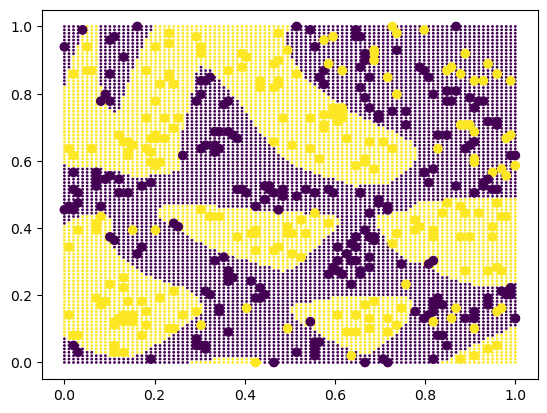

In [17]:
plt.scatter(thing[:,0], thing[:,1], c = col, s = 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.show()

In [22]:
len(var_class_results_1d0)

800

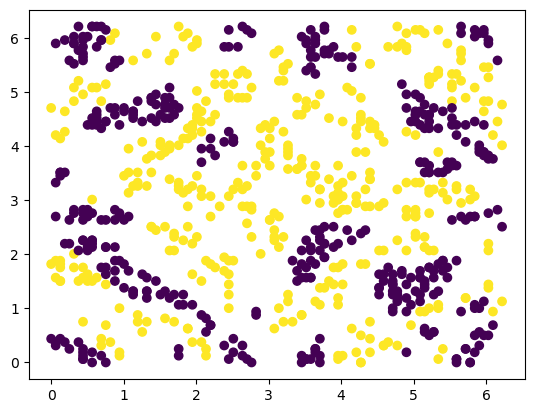

In [20]:
plt.scatter(var_class_results_1d0.iloc[:, 1], var_class_results_1d0.iloc[:, 2], c = var_class_results_1d0.iloc[:, 3])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=(2,), activation = 'tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation = 'tanh'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = "sigmoid", kernel_regularizer='l2')
])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(), #
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 24        
_________________________________________________________________
batch_normalization_10 (Batc (None, 8)                 32        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_11 (Batc (None, 8)                 32        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 169
Trainable params: 137
Non-trainable params: 32
_________________________________________________________________


In [25]:
batch_size = 32
epochs = 2000

x_train = var_class_results_1d0.iloc[idx, 1:3].values
x_train = x_train/np.max(x_train)
y_train = var_class_results_1d0.iloc[idx, 3].values
y_train = (y_train + 1)/2

# x_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
# y_train = np.array([0, 1, 1, 0])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2000
14/14 [==============================] - 0s 9ms/step - loss: 0.6517 - accuracy: 0.6409
Epoch 2/2000
14/14 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.9068
Epoch 3/2000
14/14 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.9091
Epoch 4/2000
14/14 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.9091
Epoch 5/2000
14/14 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.9091
Epoch 6/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.9091
Epoch 7/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.9091
Epoch 8/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.9091
Epoch 9/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.9091
Epoch 10/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.9091

14/14 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9091
Epoch 83/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2820 - accuracy: 0.9091
Epoch 84/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9091
Epoch 85/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9091
Epoch 86/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9091
Epoch 87/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9091
Epoch 88/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9091
Epoch 89/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9091
Epoch 90/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.9091
Epoch 91/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.9091
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.9091
Epoch 163/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9091
Epoch 164/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9091
Epoch 165/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.9091
Epoch 166/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9091
Epoch 167/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9091
Epoch 168/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.9091
Epoch 169/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.9091
Epoch 170/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.9091
Epoch 171/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9091
Epoch 243/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9091
Epoch 244/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9091
Epoch 245/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9136
Epoch 246/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9091
Epoch 247/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9114
Epoch 248/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.9091
Epoch 249/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2620 - accuracy: 0.9068
Epoch 250/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.9114
Epoch 251/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.9091
Epoch 323/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9091
Epoch 324/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.9091
Epoch 325/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.9091
Epoch 326/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9114
Epoch 327/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9091
Epoch 328/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9114
Epoch 329/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.9114
Epoch 330/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9068
Epoch 331/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9068
Epoch 403/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.9091
Epoch 404/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.9091
Epoch 405/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9091
Epoch 406/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9114
Epoch 407/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.9091
Epoch 408/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.9091
Epoch 409/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9114
Epoch 410/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9091
Epoch 411/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9091
Epoch 483/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9114
Epoch 484/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.9114
Epoch 485/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.9091
Epoch 486/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.9091
Epoch 487/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.9068
Epoch 488/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2540 - accuracy: 0.9091
Epoch 489/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.9091
Epoch 490/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9136
Epoch 491/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9136
Epoch 563/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9091
Epoch 564/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9091
Epoch 565/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.9114
Epoch 566/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9091
Epoch 567/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2440 - accuracy: 0.9136
Epoch 568/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.9136
Epoch 569/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9114
Epoch 570/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9091
Epoch 571/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9000
Epoch 643/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.9045
Epoch 644/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.9114
Epoch 645/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9091
Epoch 646/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9114
Epoch 647/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9114
Epoch 648/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9114
Epoch 649/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9091
Epoch 650/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9136
Epoch 651/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.9091
Epoch 723/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9091
Epoch 724/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9136
Epoch 725/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9091
Epoch 726/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9114
Epoch 727/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9114
Epoch 728/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9091
Epoch 729/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9091
Epoch 730/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.9114
Epoch 731/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9114
Epoch 803/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9136
Epoch 804/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9114
Epoch 805/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9136
Epoch 806/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9114
Epoch 807/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9068
Epoch 808/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9114
Epoch 809/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2337 - accuracy: 0.9159
Epoch 810/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9114
Epoch 811/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.

14/14 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9114
Epoch 883/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9023
Epoch 884/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8977
Epoch 885/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9114
Epoch 886/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9091
Epoch 887/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9068
Epoch 888/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9091
Epoch 889/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9136
Epoch 890/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9045
Epoch 891/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9091
Epoch 963/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9159
Epoch 964/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9136
Epoch 965/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9136
Epoch 966/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 0.9159
Epoch 967/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9182
Epoch 968/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.9136
Epoch 969/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9159
Epoch 970/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9114
Epoch 971/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9114
Epoch 1043/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9091
Epoch 1044/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9091
Epoch 1045/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9068
Epoch 1046/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9159
Epoch 1047/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9023
Epoch 1048/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2304 - accuracy: 0.9114
Epoch 1049/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9068
Epoch 1050/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9136
Epoch 1051/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2197 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9205
Epoch 1122/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9205
Epoch 1123/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.8977
Epoch 1124/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.9182
Epoch 1125/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9159
Epoch 1126/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9159
Epoch 1127/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2070 - accuracy: 0.9114
Epoch 1128/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9205
Epoch 1129/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9136
Epoch 1130/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2554 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.9250
Epoch 1201/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.9136
Epoch 1202/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9182
Epoch 1203/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9136
Epoch 1204/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9068
Epoch 1205/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9068
Epoch 1206/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2008 - accuracy: 0.9205
Epoch 1207/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9205
Epoch 1208/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9068
Epoch 1209/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2288 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9250
Epoch 1280/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9136
Epoch 1281/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9205
Epoch 1282/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9182
Epoch 1283/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9341
Epoch 1284/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9227
Epoch 1285/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9159
Epoch 1286/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9205
Epoch 1287/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9250
Epoch 1288/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1907 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9182
Epoch 1359/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9205
Epoch 1360/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9159
Epoch 1361/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9205
Epoch 1362/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9227
Epoch 1363/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9182
Epoch 1364/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9136
Epoch 1365/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2039 - accuracy: 0.9182
Epoch 1366/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9273
Epoch 1367/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2065 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9227
Epoch 1438/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9341
Epoch 1439/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9136
Epoch 1440/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9205
Epoch 1441/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9205
Epoch 1442/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9205
Epoch 1443/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.9227
Epoch 1444/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9205
Epoch 1445/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9227
Epoch 1446/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2031 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9205
Epoch 1517/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9114
Epoch 1518/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9273
Epoch 1519/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9295
Epoch 1520/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9227
Epoch 1521/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9250
Epoch 1522/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9250
Epoch 1523/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9227
Epoch 1524/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9318
Epoch 1525/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1971 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9318
Epoch 1596/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9205
Epoch 1597/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9273
Epoch 1598/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9318
Epoch 1599/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9205
Epoch 1600/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1874 - accuracy: 0.9409
Epoch 1601/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9409
Epoch 1602/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.9318
Epoch 1603/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.9023
Epoch 1604/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2100 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9318
Epoch 1675/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9318
Epoch 1676/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9227
Epoch 1677/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9364
Epoch 1678/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9386
Epoch 1679/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9159
Epoch 1680/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9159
Epoch 1681/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9273
Epoch 1682/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9250
Epoch 1683/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1958 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9136
Epoch 1754/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9182
Epoch 1755/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9205
Epoch 1756/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2239 - accuracy: 0.9205
Epoch 1757/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 0.9227
Epoch 1758/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9159
Epoch 1759/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9227
Epoch 1760/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1960 - accuracy: 0.9341
Epoch 1761/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.9273
Epoch 1762/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2022 - acc

14/14 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.9227
Epoch 1833/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9273
Epoch 1834/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9318
Epoch 1835/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9386
Epoch 1836/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9182
Epoch 1837/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9250
Epoch 1838/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9318
Epoch 1839/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9273
Epoch 1840/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9205
Epoch 1841/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1854 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9182
Epoch 1912/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9318
Epoch 1913/2000
14/14 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9136
Epoch 1914/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9273
Epoch 1915/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9250
Epoch 1916/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9273
Epoch 1917/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9205
Epoch 1918/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9341
Epoch 1919/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9227
Epoch 1920/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1994 - acc

14/14 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9318
Epoch 1991/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9205
Epoch 1992/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9205
Epoch 1993/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9295
Epoch 1994/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9227
Epoch 1995/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9250
Epoch 1996/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9318
Epoch 1997/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9250
Epoch 1998/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9250
Epoch 1999/2000
14/14 [==============================] - 0s 2ms/step - loss: 0.1977 - acc

In [26]:
y_pred = model.predict(x_train/np.max(x_train))
vals = (y_pred >= 0.5).astype('int').reshape((-1))
print(np.average(vals == y_train))

0.9431818181818182


In [27]:
x1_vals = np.linspace(0, np.max(x_train), 100)
x2_vals = np.linspace(0, np.max(x_train), 100)

thing = [(x1, x2) for x1 in x1_vals for x2 in x2_vals]
thing = np.array(thing)
y_pred = model.predict(thing)
col = (y_pred > 0.5)

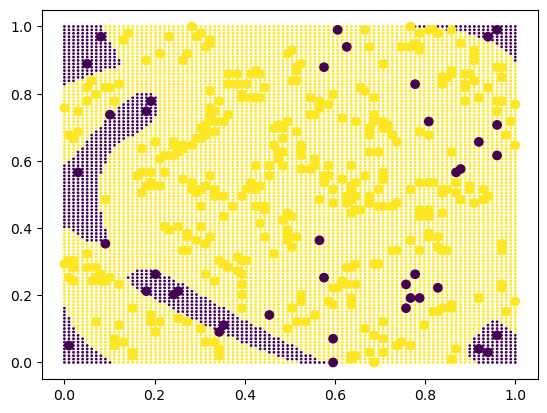

In [28]:
plt.scatter(thing[:,0], thing[:,1], c = col, s = 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train)
plt.show()

In [ ]:
x_train = dks_class_1.iloc[idx, 1:3]
y_train = dks_class_1.iloc[idx, 3]

x_test = dks_train_1.iloc[:, 1:3]
y_test = dks_train_1.iloc[:, 3]

In [ ]:
svm_model = svm.SVC(C = 5, kernel = "rbf", gamma = 5)
svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
np.mean((y_test - y_pred)**2)

In [ ]:
np.mean(y_test == y_pred)

In [ ]:
x_train

In [ ]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_test)
plt.show()

In [ ]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c = y_pred)
plt.show()

In [ ]:
svm_model.support_